<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/Transfer_Learning-Image-/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"
filename = "10_food_classes_10_percent.zip"
urllib.request.urlretrieve(url, filename)

('10_food_classes_10_percent.zip', <http.client.HTTPMessage at 0x792c503f5ed0>)

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_10_percent/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [4]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pathlib

def view_random_image(target_dir):
  target_dir = pathlib.Path(target_dir)
  class_names = np.array(sorted([item.name for item in target_dir.glob('*')]))
  rand_index = random.randint(0, len(class_names)-1)
  folder = target_dir / class_names[rand_index]
  img_path = folder / random.choice(os.listdir(folder))
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(class_names[rand_index])
  plt.axis(False)
  plt.show()

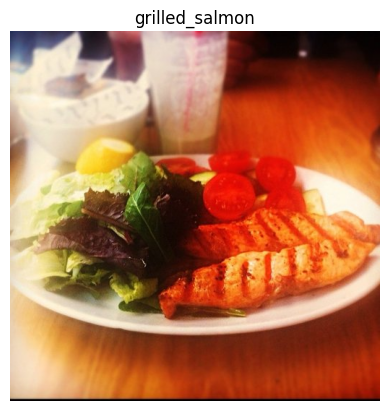

In [5]:
img = view_random_image("10_food_classes_10_percent/train")

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='categorical'
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='categorical'
                                               )

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [9]:
IMG_SHAPE = (224,224) + (3,)

In [10]:
import tensorflow_hub as hub
import tensorflow as tf

hub_layer = hub.KerasLayer("https://kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/1",
                   trainable=False)

hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: hub_layer(x))

m = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub_layer_wrapper,
    tf.keras.layers.Dense(10, activation='softmax')
])

The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'resnet_v2_50/block3/unit_1/bottleneck_v2/conv2/weights:0' shape=(3, 3, 256, 256) dtype=float32>
  <tf.Variable 'resnet_v2_50/block2/unit_2/bottleneck_v2/conv2/BatchNorm/gamma:0' shape=(128,) dtype=float32>
  <tf.Variable 'resnet_v2_50/block1/unit_3/bottleneck_v2/conv2/BatchNorm/gamma:0' shape=(64,) dtype=float32>
  <tf.Variable 'resnet_v2_50/block3/unit_6/bottleneck_v2/conv2/weights:0' shape=(3, 3, 256, 256) dtype=float32>
  <tf.Variable 'resnet_v2_50/block3/unit_1/bottleneck_v2/shortcut/weights:0' shape=(1, 1, 512, 1024) dtype=float32>
  <tf.Variable 'resnet_v2_50/block2/unit_2/bottleneck_v2/conv2/weights:0' shape=(3, 3, 128, 128) dtype=float32>
  <tf.Variable 'resnet_v2_50/block4/unit_3/bottleneck_v2/conv2/BatchNorm/beta:0' shape=(512,) dtype=float32>
  <tf.Variable 'resnet_v2_50/block4/unit_1/bottleneck_v2/preact/beta:0' shape=(1024,) dtype=float32>
  <tf.Var

In [11]:
m.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [12]:
history = m.fit(train_data,
                epochs=10,
                validation_data=test_data,
                callbacks=[create_tensorboard_callback("training_logs", "resnet_v2_10_percent_data")]
                )

Saving TensorBoard log files to: training_logs/resnet_v2_10_percent_data/20240905-034331
Epoch 1/10
30/30 [==============================] - 69s 2s/step - loss: 1.9019 - accuracy: 0.3533 - val_loss: 1.1784 - val_accuracy: 0.6104
Epoch 2/10
30/30 [==============================] - 44s 2s/step - loss: 0.8604 - accuracy: 0.7280 - val_loss: 0.8512 - val_accuracy: 0.7180
Epoch 3/10
30/30 [==============================] - 43s 1s/step - loss: 0.5808 - accuracy: 0.8253 - val_loss: 0.7740 - val_accuracy: 0.7500
Epoch 4/10
30/30 [==============================] - 45s 2s/step - loss: 0.4494 - accuracy: 0.8880 - val_loss: 0.7146 - val_accuracy: 0.7652
Epoch 5/10
30/30 [==============================] - 44s 1s/step - loss: 0.3500 - accuracy: 0.9280 - val_loss: 0.6858 - val_accuracy: 0.7776
Epoch 6/10
30/30 [==============================] - 45s 2s/step - loss: 0.2826 - accuracy: 0.9480 - val_loss: 0.6689 - val_accuracy: 0.7824
Epoch 7/10
30/30 [==============================] - 44s 1s/step - loss:

In [14]:
custom_test_images = "/content/drive/MyDrive/Cutom_Test_images"
custom_test_images_list = os.listdir(custom_test_images)

In [15]:
def precprocess_image(filename):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, (224, 224))
  img = img/255.
  return img

1/1 [==============================] - 1s 574ms/step


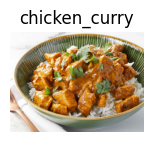

1/1 [==============================] - 0s 71ms/step


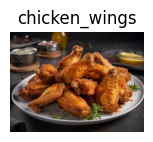

1/1 [==============================] - 0s 73ms/step


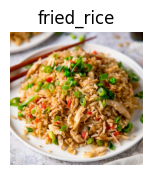

1/1 [==============================] - 0s 70ms/step


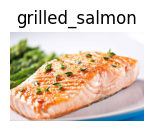

1/1 [==============================] - 0s 71ms/step


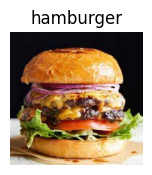

1/1 [==============================] - 0s 71ms/step


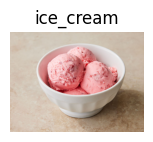

1/1 [==============================] - 0s 70ms/step


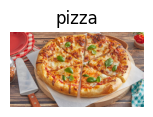

1/1 [==============================] - 0s 69ms/step


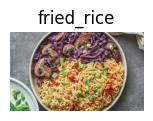

1/1 [==============================] - 0s 69ms/step


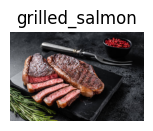

1/1 [==============================] - 0s 68ms/step


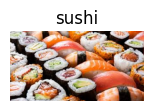

In [16]:
for i in range(1,11):
  filename = custom_test_images + "/" + str(i) + ".jpg"
  img = precprocess_image(filename)
  img = tf.expand_dims(img, axis=0)
  pred = m.predict(img)
  plt.figure(figsize=(10,10))
  plt.subplot(5,5,i)
  plt.imshow(mpimg.imread(filename))
  plt.title(class_names[np.argmax(pred)])
  plt.axis("off")
  plt.show()

In [19]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

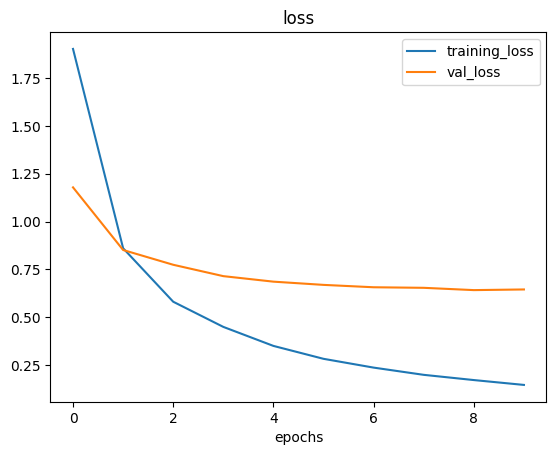

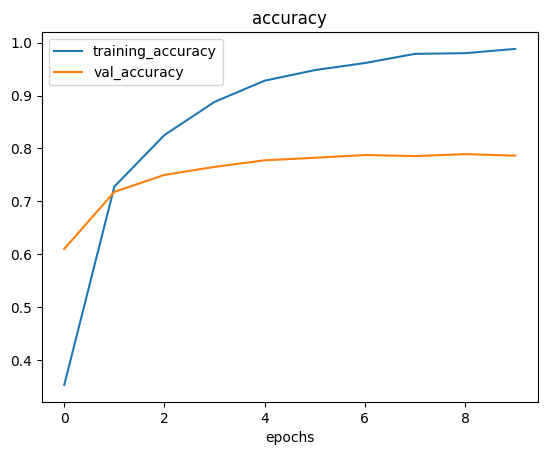

In [20]:
plot_loss_curves(history)

In [31]:
import tensorflow_hub as hub
model_efficient = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1",
                   trainable=False),
])
hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: model_efficient(x))

model_efficientNet = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub_layer_wrapper,
    tf.keras.layers.Dense(10, activation='softmax')
])

The following Variables were used a Lambda layer's call (lambda_3), but
are not present in its tracked objects:
  <tf.Variable 'top_bn/beta:0' shape=(1280,) dtype=float32>
  <tf.Variable 'top_bn/gamma:0' shape=(1280,) dtype=float32>
  <tf.Variable 'top_conv2d/kernel:0' shape=(1, 1, 320, 1280) dtype=float32>
  <tf.Variable 'stack_6/block_0/project_bn/beta:0' shape=(320,) dtype=float32>
  <tf.Variable 'stack_6/block_0/project_bn/gamma:0' shape=(320,) dtype=float32>
  <tf.Variable 'stack_6/block_0/project_conv2d/kernel:0' shape=(1, 1, 1152, 320) dtype=float32>
  <tf.Variable 'stack_6/block_0/se_expand_conv2d/bias:0' shape=(1152,) dtype=float32>
  <tf.Variable 'stack_6/block_0/se_expand_conv2d/kernel:0' shape=(1, 1, 48, 1152) dtype=float32>
  <tf.Variable 'stack_6/block_0/se_reduce_conv2d/bias:0' shape=(48,) dtype=float32>
  <tf.Variable 'stack_6/block_0/se_reduce_conv2d/kernel:0' shape=(1, 1, 1152, 48) dtype=float32>
  <tf.Variable 'stack_6/block_0/depthwise_bn/beta:0' shape=(1152,) dtype

In [32]:
model_efficientNet.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

history = model_efficientNet.fit(train_data,
                epochs=10,
                validation_data=test_data,
                callbacks=[create_tensorboard_callback("training_logs", "efficientNet_10_percent_data")]
                )

Saving TensorBoard log files to: training_logs/efficientNet_10_percent_data/20240905-044553
Epoch 1/10
30/30 [==============================] - 48s 961ms/step - loss: 1.7509 - accuracy: 0.4893 - val_loss: 1.1848 - val_accuracy: 0.7520
Epoch 2/10
30/30 [==============================] - 30s 1s/step - loss: 0.9548 - accuracy: 0.7907 - val_loss: 0.7955 - val_accuracy: 0.8376
Epoch 3/10
30/30 [==============================] - 28s 949ms/step - loss: 0.6891 - accuracy: 0.8360 - val_loss: 0.6516 - val_accuracy: 0.8508
Epoch 4/10
30/30 [==============================] - 28s 948ms/step - loss: 0.5534 - accuracy: 0.8800 - val_loss: 0.5769 - val_accuracy: 0.8572
Epoch 5/10
30/30 [==============================] - 27s 936ms/step - loss: 0.4674 - accuracy: 0.8973 - val_loss: 0.5303 - val_accuracy: 0.8676
Epoch 6/10
30/30 [==============================] - 28s 939ms/step - loss: 0.4019 - accuracy: 0.9240 - val_loss: 0.4963 - val_accuracy: 0.8680
Epoch 7/10
30/30 [==============================] - 2

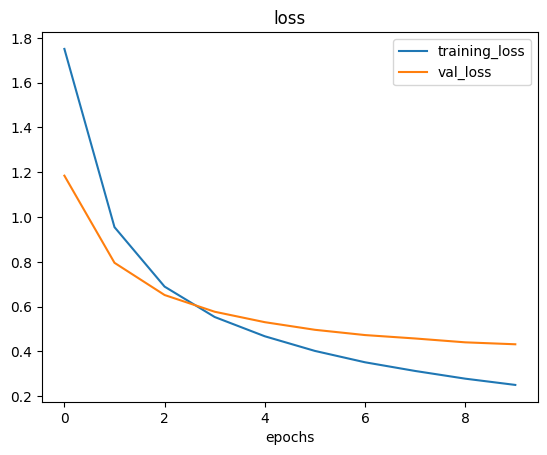

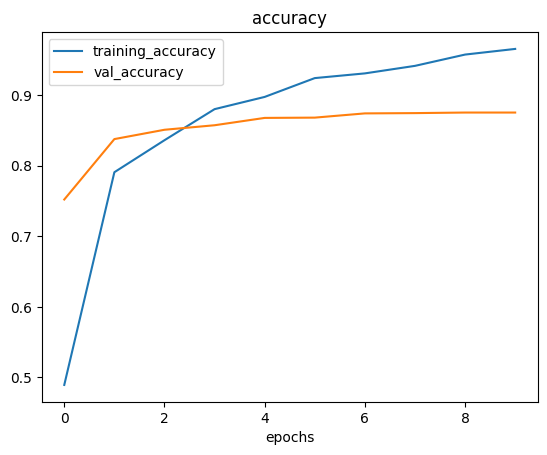

In [33]:
plot_loss_curves(history)